In [31]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add src directory to path
sys.path.append('../src')

# Reload modules to pick up changes
import importlib
if 'data_loader' in sys.modules:
    importlib.reload(sys.modules['data_loader'])
if 'eda' in sys.modules:
    importlib.reload(sys.modules['eda'])

# Import custom modules
from data_loader import DataLoader, load_and_prepare_data
from eda import EDAAnalyzer

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load the Data

We'll start by loading a sample of the dataset to perform EDA. Given the large size (1.4M+ rows), we'll work with a manageable subset initially.

In [11]:
# Define data path
DATA_PATH = '../Data/newsData/raw_analyst_ratings.csv'

# Initialize data loader
loader = DataLoader(DATA_PATH)

# Load data - start with 100k rows for initial analysis
print("Loading data...")
df = loader.load_data(nrows=100000)

print(f"\nDataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

INFO:data_loader:Loading data from ../Data/newsData/raw_analyst_ratings.csv


Loading data...


INFO:data_loader:Loaded 100000 rows



Dataset shape: (100000, 5)

First few rows:


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


## 2. Data Overview and Basic Information

In [3]:
# Display data info
print("=== Dataset Information ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Sample Records ===")
df.sample(10)

=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   headline   100000 non-null  object
 1   url        100000 non-null  object
 2   publisher  100000 non-null  object
 3   date       100000 non-null  object
 4   stock      100000 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB
None

=== Missing Values ===
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

=== Data Types ===
headline     object
url          object
publisher    object
date         object
stock        object
dtype: object

=== Sample Records ===
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

=== Data Types ===
headline     object
url          object
publisher    object
date         object
stock        object
dtype: object

=== Sample Records ===


,headline,url,publisher,date,stock
99409,45 Biggest Movers From Yesterday,https://www.benzinga.com/news/18/10/12463248/4...,Lisa Levin,2018-10-05 00:00:00,ASMB
56614,"JP Morgan Maintains Overweight on Air Lease, R...",https://www.benzinga.com/news/18/03/11311225/j...,Vick Meyer,2018-03-06 00:00:00,AL
62986,13F From Omega Shows Liquidated 100K Share Sta...,https://www.benzinga.com/news/18/11/12697520/1...,Benzinga Newsdesk,2018-11-14 00:00:00,ALLY
22878,Adobe Systems Incorporated Sees FY2013 EPS ~$1...,https://www.benzinga.com/news/12/12/3172668/ad...,Paul Quintaro,2012-12-13 00:00:00,ADBE
1316,GeoMet Announces Financial and Operating Resul...,https://www.benzinga.com/09/08/1252/geomet-ann...,Benzinga Staff,2009-08-10 00:00:00,A
33868,25 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/16/11/8752646/25...,Lisa Levin,2016-11-30 00:00:00,AEO
45174,Assured Guaranty Board Authorizes Added $250M ...,https://www.benzinga.com/news/16/02/6677293/as...,Paul Quintaro,2016-02-25 00:00:00,AGO
32307,Canaccord Genuity Maintains Buy on Aegerion Ph...,https://www.benzinga.com/news/13/01/3228512/ca...,Juan Lopez,2013-01-09 00:00:00,AEGR
29207,"7 Stocks To Watch For June 20, 2017",https://www.benzinga.com/news/earnings/17/06/9...,Lisa Levin,2017-06-20 00:00:00,ADSK
24441,Shares of many semiconductor companies are tra...,https://www.benzinga.com/markets/wiim/19/09/14...,Benzinga Newsdesk,2019-09-04 00:00:00,ADI


## 3. Data Preprocessing

In [12]:
# Preprocess the data
print("Preprocessing data...")
df = loader.preprocess()

print(f"\nDataset shape after preprocessing: {df.shape}")
print(f"\nNew columns added:")
print(df.columns.tolist())

df.head()

INFO:data_loader:Preprocessing data...


Preprocessing data...


INFO:data_loader:Preprocessing complete. 99159 rows after cleaning.



Dataset shape after preprocessing: (99159, 13)

New columns added:
['headline', 'url', 'publisher', 'date', 'stock', 'year', 'month', 'day', 'hour', 'dayofweek', 'date_only', 'headline_length', 'word_count']


,headline,url,publisher,date,stock,year,month,day,hour,dayofweek,date_only,headline_length,word_count
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020,6,5,14,4,2020-06-05,39,7
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020,6,3,14,2,2020-06-03,42,7
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020,5,26,8,1,2020-05-26,29,5
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020,5,22,16,4,2020-05-22,44,7
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020,5,22,15,4,2020-05-22,87,14


## 4. Descriptive Statistics

Let's examine basic statistics for textual lengths and other numerical features.

In [13]:
# Initialize EDA Analyzer
eda = EDAAnalyzer(df)

# Get descriptive statistics
stats = eda.descriptive_statistics()

print("=== DESCRIPTIVE STATISTICS ===\n")
print(f"Total Articles: {stats['total_articles']:,}")
print(f"Unique Stocks: {stats['unique_stocks']:,}")
print(f"Unique Publishers: {stats['unique_publishers']:,}")
print(f"\nDate Range:")
print(f"  From: {stats['date_range'][0]}")
print(f"  To: {stats['date_range'][1]}")

print("\n=== Headline Length Statistics ===")
print(stats['headline_length_stats'])

print("\n=== Word Count Statistics ===")
print(stats['word_count_stats'])

=== DESCRIPTIVE STATISTICS ===

Total Articles: 99,159
Unique Stocks: 388
Unique Publishers: 522

Date Range:
  From: 2009-04-29 00:00:00+00:00
  To: 2020-06-10 19:17:32+00:00

=== Headline Length Statistics ===
count    99159.000000
mean        73.786373
std         40.546292
min          7.000000
25%         47.000000
50%         65.000000
75%         88.000000
max        458.000000
Name: headline_length, dtype: float64

=== Word Count Statistics ===
count    99159.000000
mean        11.401456
std          6.163183
min          1.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         70.000000
Name: word_count, dtype: float64


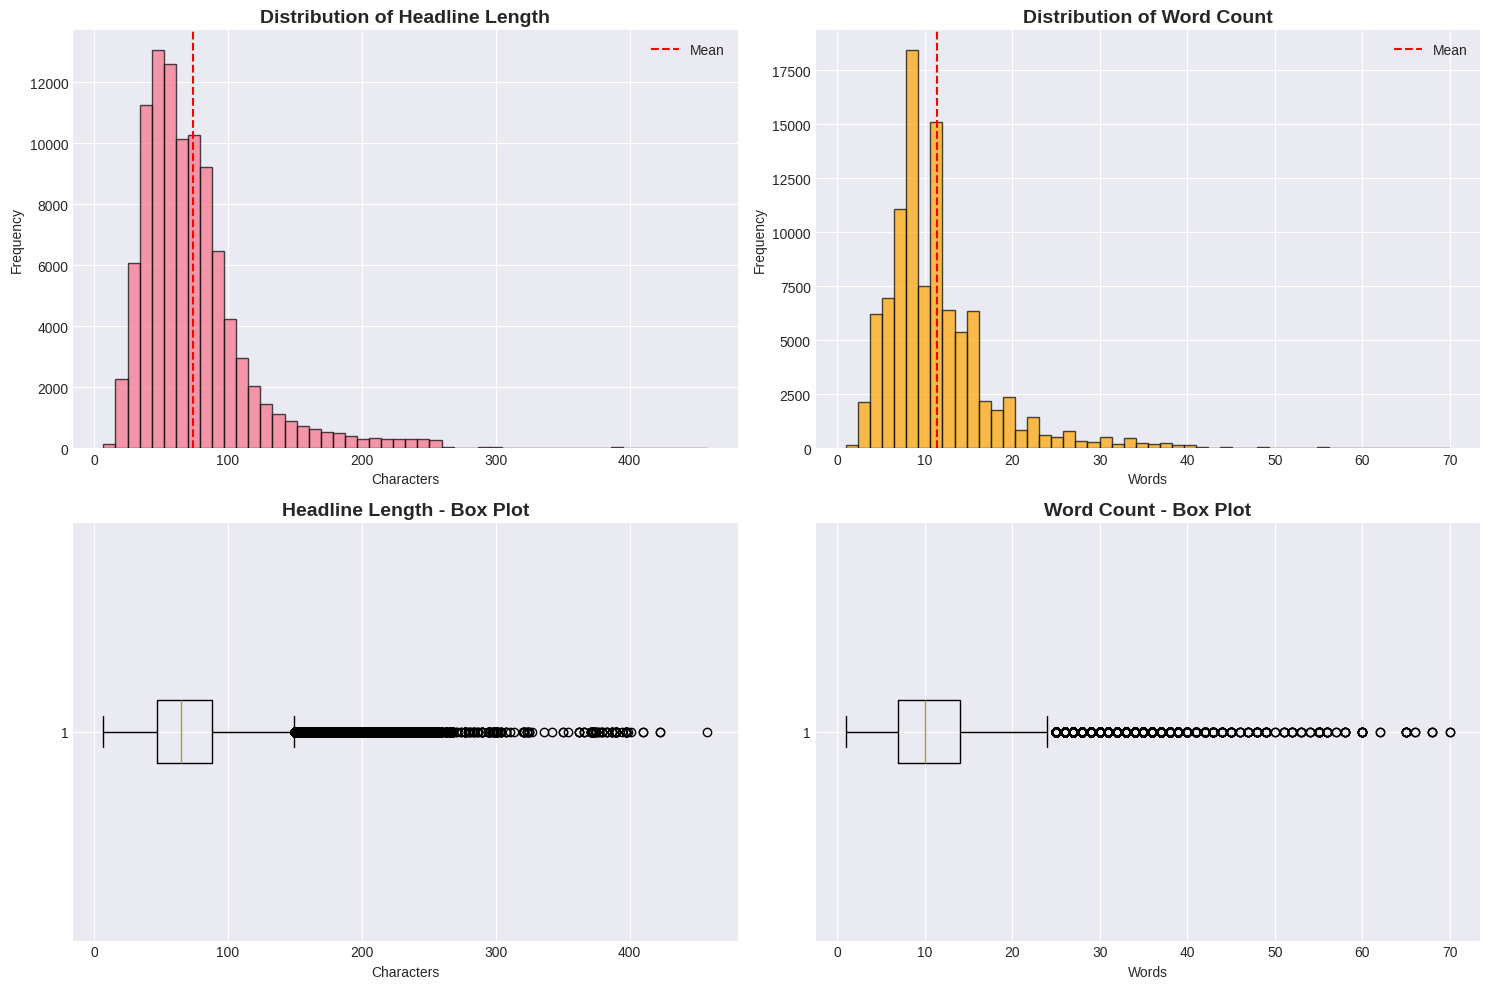


=== Key Insights ===
Average headline length: 73.8 characters
Average word count: 11.4 words
Median headline length: 65 characters
Median word count: 10 words


In [14]:
# Visualize headline length and word count distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Headline length distribution
axes[0, 0].hist(df['headline_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Headline Length', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['headline_length'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].legend()

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Word Count', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 1].legend()

# Box plots
axes[1, 0].boxplot(df['headline_length'], vert=False)
axes[1, 0].set_title('Headline Length - Box Plot', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Characters')

axes[1, 1].boxplot(df['word_count'], vert=False)
axes[1, 1].set_title('Word Count - Box Plot', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Words')

plt.tight_layout()
plt.show()

print("\n=== Key Insights ===")
print(f"Average headline length: {df['headline_length'].mean():.1f} characters")
print(f"Average word count: {df['word_count'].mean():.1f} words")
print(f"Median headline length: {df['headline_length'].median():.0f} characters")
print(f"Median word count: {df['word_count'].median():.0f} words")

## 5. Publisher Analysis

Identify which publishers are most active and their coverage patterns.

In [15]:
# Get publisher statistics
publisher_stats = eda.publisher_analysis()

print("=== TOP 20 PUBLISHERS BY ARTICLE COUNT ===\n")
print(publisher_stats.head(20))

print("\n=== Publisher Summary ===")
print(f"Total publishers: {len(publisher_stats)}")
print(f"Most active publisher: {publisher_stats.index[0]} ({publisher_stats.iloc[0]['article_count']:,} articles)")
print(f"Average articles per publisher: {publisher_stats['article_count'].mean():.1f}")
print(f"Median articles per publisher: {publisher_stats['article_count'].median():.0f}")

=== TOP 20 PUBLISHERS BY ARTICLE COUNT ===

                   article_count  unique_stocks_covered
publisher                                              
Paul Quintaro              16732                    324
Lisa Levin                 14115                    325
Benzinga Newsdesk          10850                    276
Charles Gross               6514                    296
Monica Gerson               6153                    282
Eddie Staley                4224                    312
Hal Lindon                  3698                    309
Benzinga Staff              2345                    215
Vick Meyer                  2130                    181
Juan Lopez                  2104                    201
Shanthi Rexaline            1654                    131
Zacks                       1641                    165
Benzinga_Newsdesk           1436                    215
Allie Wickman               1163                    199
webmaster                   1130                    161
Jays

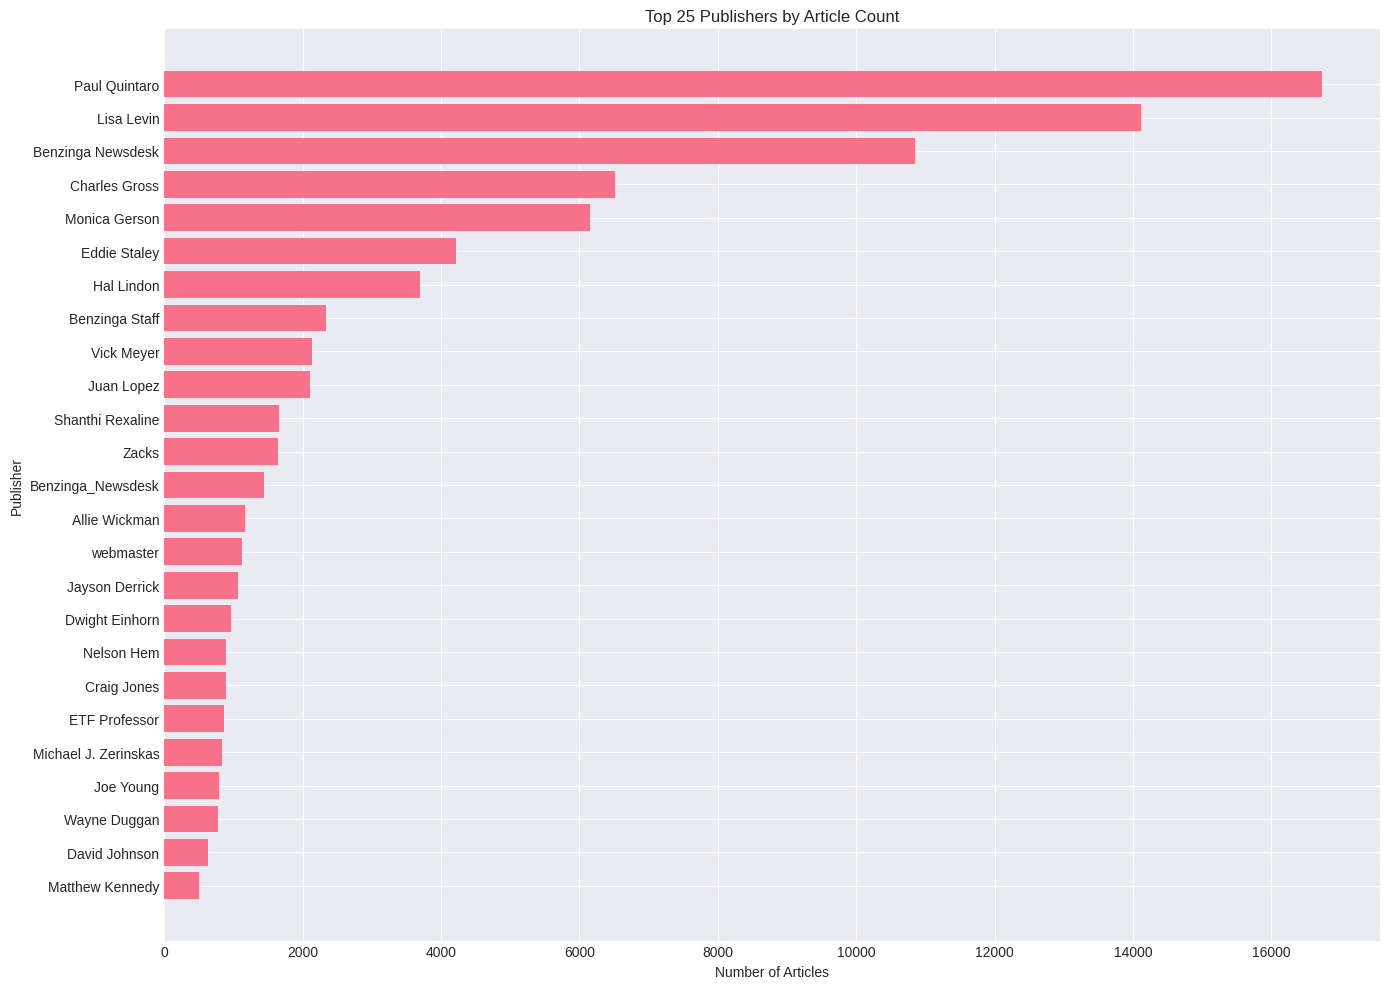


=== Publisher Concentration ===
Top 10 publishers account for: 69.4% of all articles
Top 20 publishers account for: 81.2% of all articles


In [16]:
# Visualize top publishers
fig = eda.plot_publisher_distribution(top_n=25, figsize=(14, 10))
plt.show()

# Publisher concentration analysis
top_10_pct = (publisher_stats.head(10)['article_count'].sum() / publisher_stats['article_count'].sum()) * 100
top_20_pct = (publisher_stats.head(20)['article_count'].sum() / publisher_stats['article_count'].sum()) * 100

print(f"\n=== Publisher Concentration ===")
print(f"Top 10 publishers account for: {top_10_pct:.1f}% of all articles")
print(f"Top 20 publishers account for: {top_20_pct:.1f}% of all articles")

=== TOP PUBLISHER DOMAINS ===

publisher_domain
Named Author      98500
benzinga.com        638
gmail.com            19
andyswan.com          1
investdiva.com        1
Name: count, dtype: int64


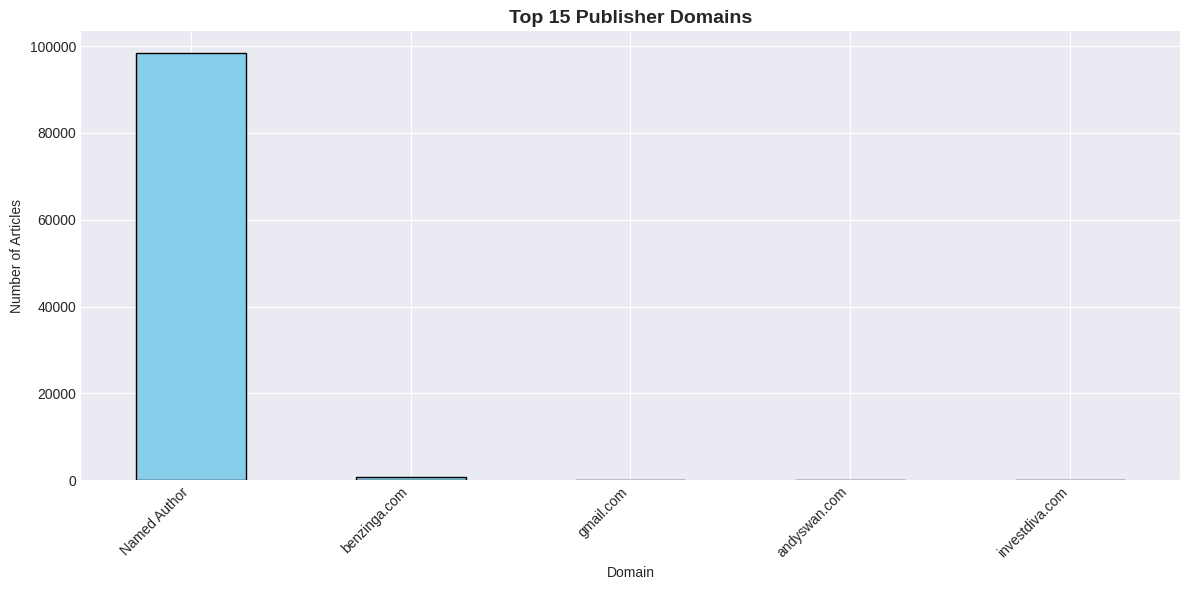

In [17]:
# Identify publisher domains
df['publisher_domain'] = df['publisher'].apply(
    lambda x: x.split('@')[1] if '@' in str(x) else 'Named Author'
)

domain_counts = df['publisher_domain'].value_counts().head(15)

print("=== TOP PUBLISHER DOMAINS ===\n")
print(domain_counts)

# Visualize
plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 15 Publisher Domains', fontsize=14, fontweight='bold')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 6. Stock Analysis

Analyze which stocks receive the most coverage.

In [18]:
# Get stock statistics
stock_stats = eda.stock_analysis()

print("=== TOP 30 STOCKS BY ARTICLE COUNT ===\n")
print(stock_stats.head(30))

print("\n=== Stock Coverage Summary ===")
print(f"Total unique stocks: {len(stock_stats)}")
print(f"Most covered stock: {stock_stats.index[0]} ({stock_stats.iloc[0]['article_count']:,} articles)")
print(f"Average articles per stock: {stock_stats['article_count'].mean():.1f}")
print(f"Median articles per stock: {stock_stats['article_count'].median():.0f}")

=== TOP 30 STOCKS BY ARTICLE COUNT ===

       article_count  unique_publishers
stock                                  
AA              2697                202
AGN             2398                129
ADBE            1988                148
APC             1651                135
AIG             1592                133
AKS             1549                107
ANF             1524                131
AEO             1465                139
A               1417                112
AET             1362                120
ACN             1303                102
AMTD            1140                137
ADSK            1132                109
ALK             1090                 99
ADI             1001                 98
ARNA             992                 97
ABX              991                124
AOL              937                106
AMAT             825                 52
AAP              817                 92
ARIA             804                 72
ARO              800                 99


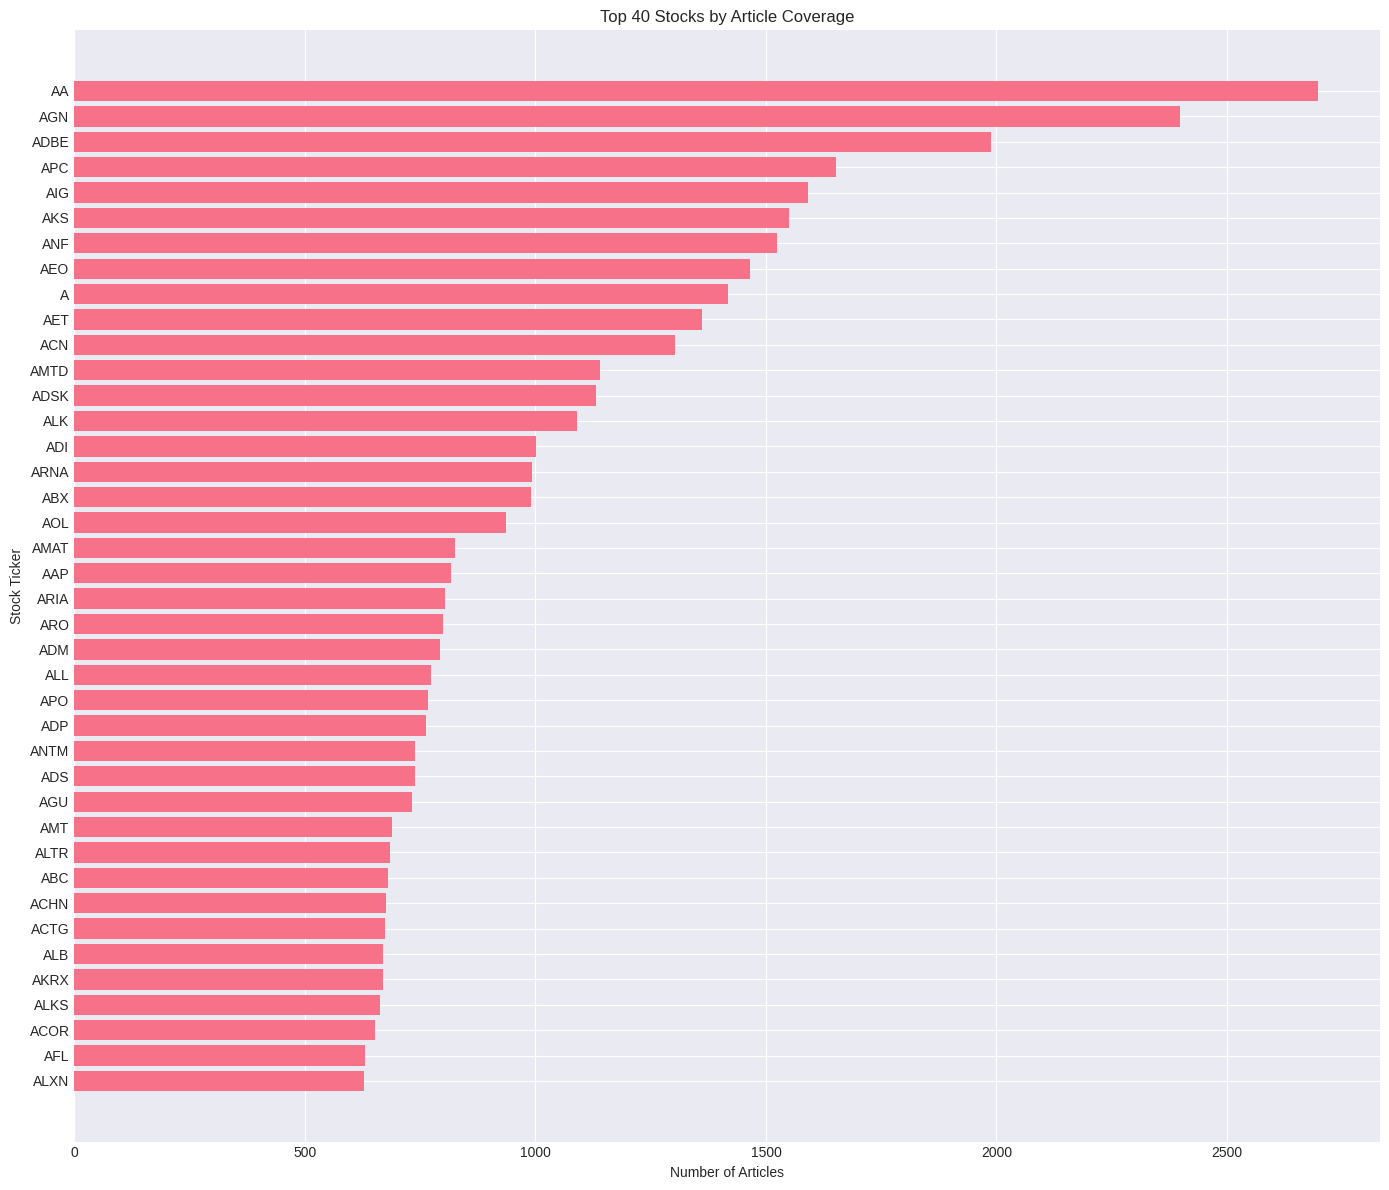


=== Stock Coverage Concentration ===
Top 50 stocks account for: 48.2% of all articles
Top 100 stocks account for: 68.2% of all articles


In [19]:
# Visualize top stocks
fig = eda.plot_stock_distribution(top_n=40, figsize=(14, 12))
plt.show()

# Stock coverage concentration
top_50_stocks_pct = (stock_stats.head(50)['article_count'].sum() / stock_stats['article_count'].sum()) * 100
top_100_stocks_pct = (stock_stats.head(100)['article_count'].sum() / stock_stats['article_count'].sum()) * 100

print(f"\n=== Stock Coverage Concentration ===")
print(f"Top 50 stocks account for: {top_50_stocks_pct:.1f}% of all articles")
print(f"Top 100 stocks account for: {top_100_stocks_pct:.1f}% of all articles")

## 7. Time Series Analysis

Analyze publication patterns over time - daily, hourly, and day-of-week trends.

In [20]:
# Get time series statistics
time_stats = eda.time_series_analysis()

print("=== TIME SERIES ANALYSIS ===\n")

print("Daily article statistics:")
print(f"  Average: {time_stats['daily'].mean():.1f} articles/day")
print(f"  Median: {time_stats['daily'].median():.0f} articles/day")
print(f"  Max: {time_stats['daily'].max():,} articles (on {time_stats['daily'].idxmax()})")
print(f"  Min: {time_stats['daily'].min():,} articles (on {time_stats['daily'].idxmin()})")

print("\nHourly distribution (top 5 hours):")
print(time_stats['hourly'].sort_values(ascending=False).head())

print("\nDay of week distribution:")
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day_idx, count in time_stats['day_of_week'].items():
    print(f"  {day_names[day_idx]}: {count:,} articles")

=== TIME SERIES ANALYSIS ===

Daily article statistics:
  Average: 28.8 articles/day
  Median: 28 articles/day
  Max: 202 articles (on 2020-03-12)
  Min: 1 articles (on 2009-04-29)

Hourly distribution (top 5 hours):
hour
0     95479
14      469
12      440
16      384
13      384
dtype: int64

Day of week distribution:
  Monday: 19,177 articles
  Tuesday: 21,126 articles
  Wednesday: 21,338 articles
  Thursday: 20,972 articles
  Friday: 15,013 articles
  Saturday: 474 articles
  Sunday: 1,059 articles


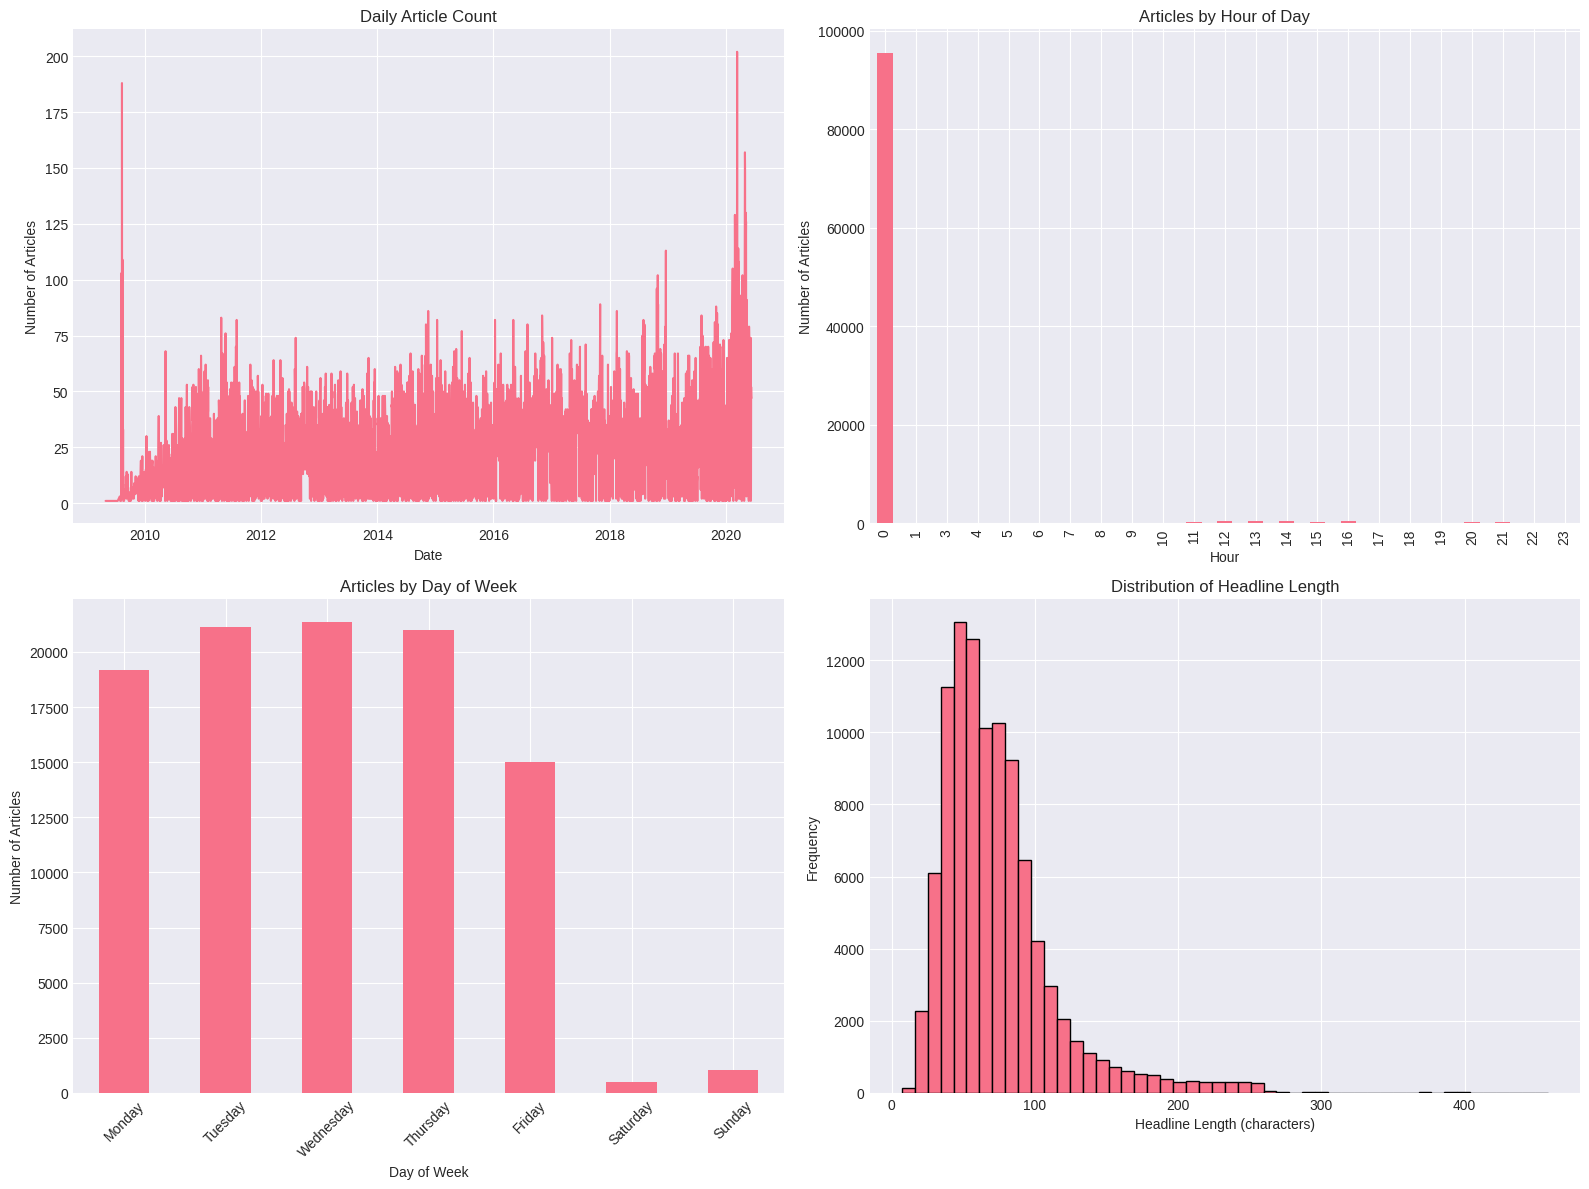

In [21]:
# Comprehensive time series visualization
fig = eda.plot_time_series(figsize=(16, 12))
plt.show()

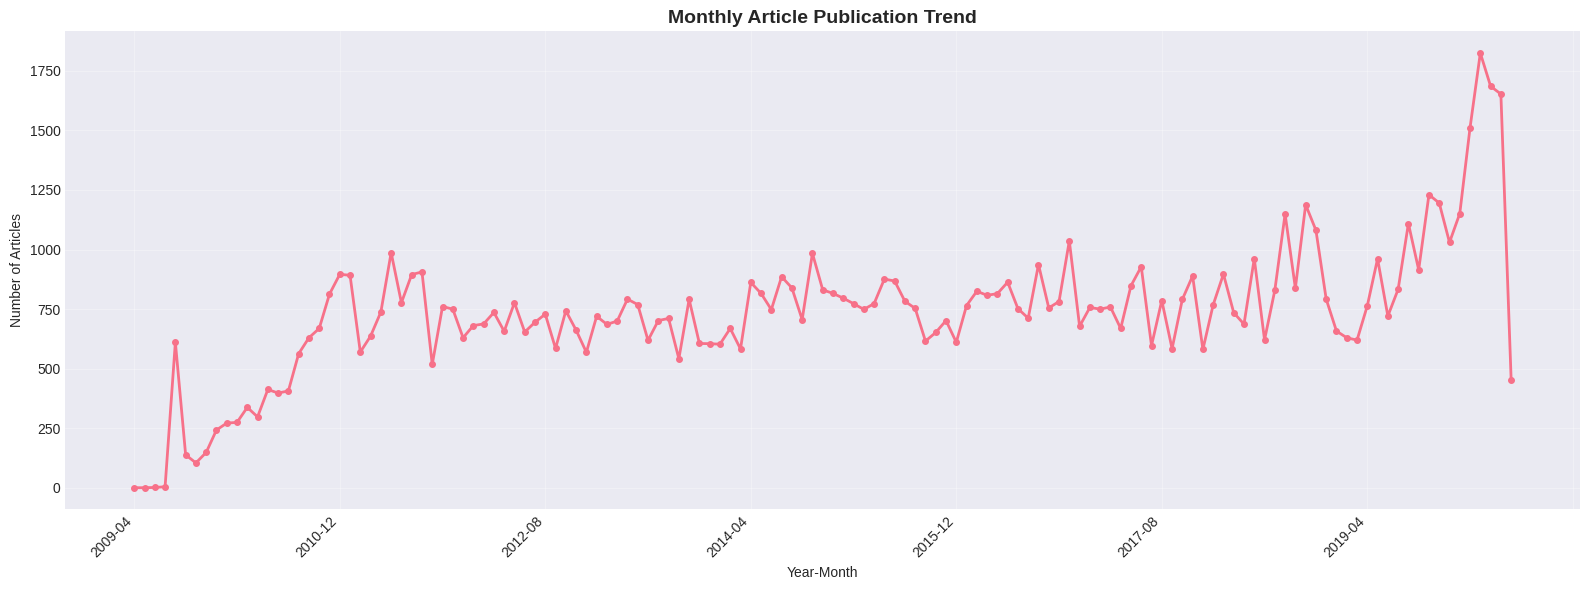


=== Monthly Trend Insights ===
Highest publication month: 2020-03 with 1,824 articles
Lowest publication month: 2009-04 with 1 articles


In [22]:
# Analyze monthly trends
monthly_trend = df.groupby([df['year'], df['month']]).size()
monthly_trend.index = monthly_trend.index.map(lambda x: f"{x[0]}-{x[1]:02d}")

plt.figure(figsize=(16, 6))
monthly_trend.plot(kind='line', marker='o', linewidth=2, markersize=4)
plt.title('Monthly Article Publication Trend', fontsize=14, fontweight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== Monthly Trend Insights ===")
print(f"Highest publication month: {monthly_trend.idxmax()} with {monthly_trend.max():,} articles")
print(f"Lowest publication month: {monthly_trend.idxmin()} with {monthly_trend.min():,} articles")

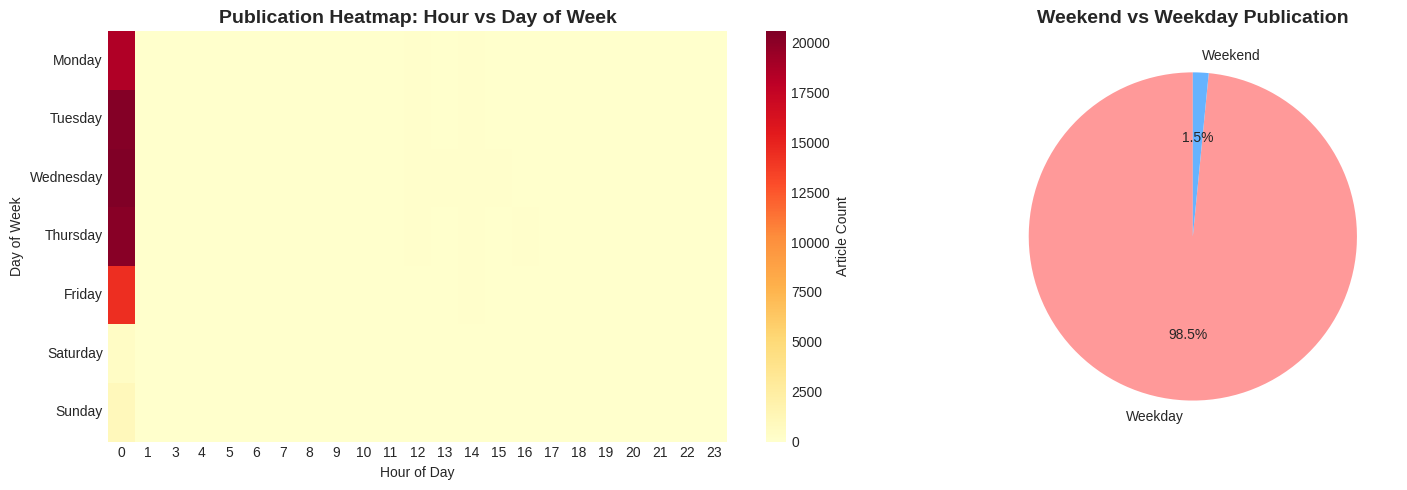


=== Publication Timing Insights ===
Weekday articles: 97,626 (98.5%)
Weekend articles: 1,533 (1.5%)


In [23]:
# Analyze publication time patterns
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Hourly heatmap by day of week
hourly_dow = df.groupby(['dayofweek', 'hour']).size().unstack(fill_value=0)
sns.heatmap(hourly_dow, cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Article Count'})
axes[0].set_title('Publication Heatmap: Hour vs Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Day of Week')
axes[0].set_yticklabels(day_names, rotation=0)

# Weekend vs Weekday
df['is_weekend'] = df['dayofweek'].isin([5, 6])
weekend_counts = df.groupby('is_weekend').size()
axes[1].pie(weekend_counts, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', 
           startangle=90, colors=['#ff9999', '#66b3ff'])
axes[1].set_title('Weekend vs Weekday Publication', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n=== Publication Timing Insights ===")
print(f"Weekday articles: {weekend_counts[False]:,} ({weekend_counts[False]/len(df)*100:.1f}%)")
print(f"Weekend articles: {weekend_counts[True]:,} ({weekend_counts[True]/len(df)*100:.1f}%)")

## 8. Text Analysis and Topic Modeling

Extract common keywords and themes from headlines.

In [24]:
# Extract top keywords
print("Extracting keywords from headlines...")
keywords = eda.extract_keywords(n_keywords=50)

print("\n=== TOP 50 KEYWORDS IN HEADLINES ===\n")
for i, (word, count) in enumerate(keywords, 1):
    print(f"{i:2d}. {word:20s} - {count:,} occurrences")

Extracting keywords from headlines...

=== TOP 50 KEYWORDS IN HEADLINES ===

 1. stocks               - 11,914 occurrences
 2. est                  - 9,623 occurrences
 3. eps                  - 9,086 occurrences
 4. shares               - 8,721 occurrences
 5. reports              - 7,988 occurrences
 6. update               - 6,473 occurrences
 7. market               - 6,439 occurrences
 8. earnings             - 6,236 occurrences
 9. top                  - 5,934 occurrences
10. announces            - 5,407 occurrences
11. sales                - 5,204 occurrences
12. buy                  - 4,687 occurrences
13. price                - 4,646 occurrences
14. trading              - 4,638 occurrences
15. downgrades           - 4,594 occurrences
16. raises               - 4,527 occurrences
17. target               - 4,514 occurrences
18. upgrades             - 4,235 occurrences
19. maintains            - 4,234 occurrences
20. benzinga's           - 4,228 occurrences
21. american          

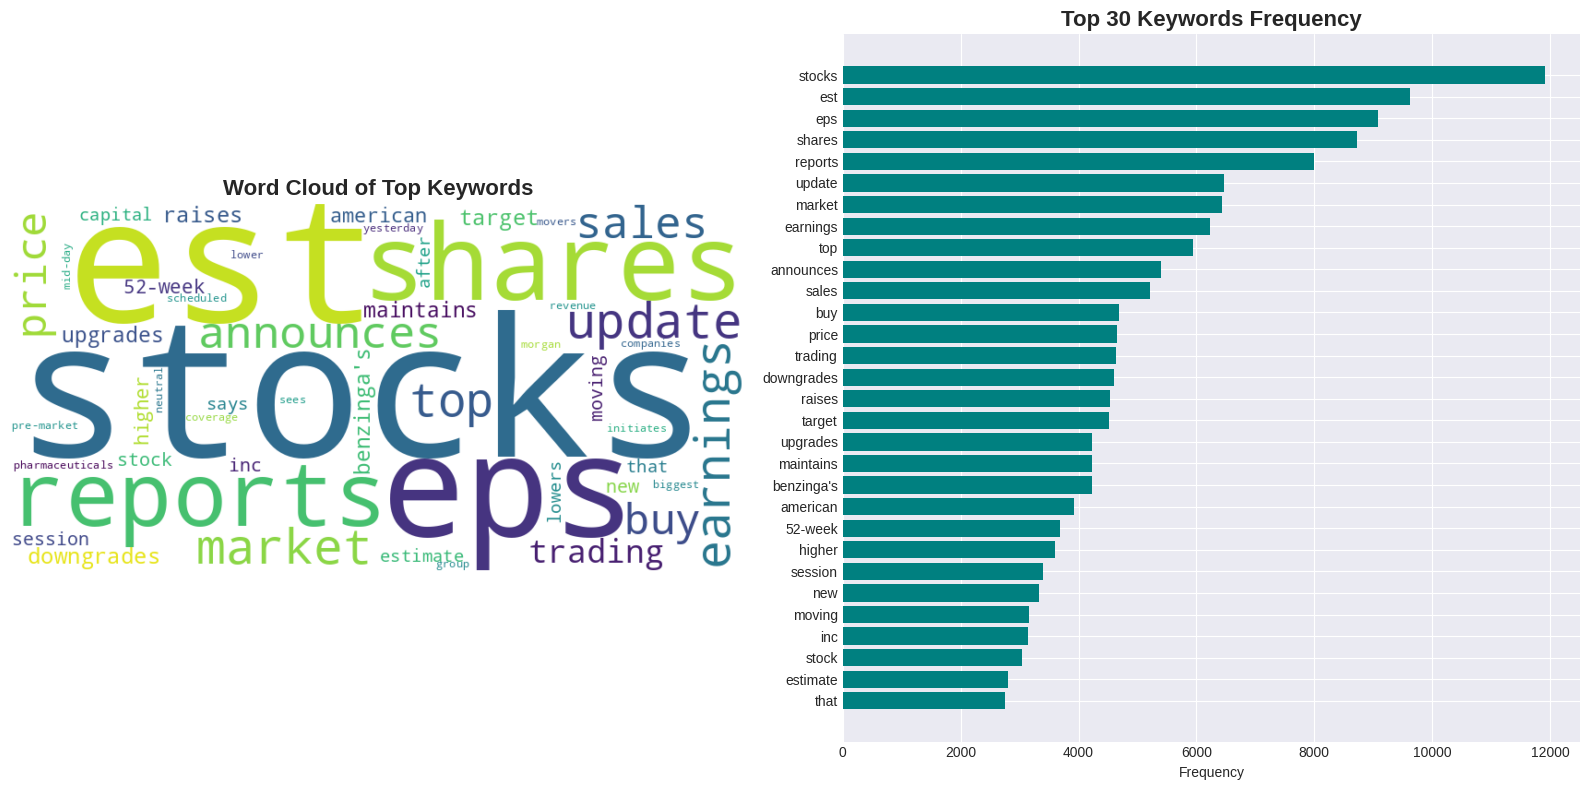

In [25]:
# Visualize top keywords
from wordcloud import WordCloud

# Create word frequency dictionary for word cloud
word_freq = dict(keywords[:100])

plt.figure(figsize=(16, 8))

# Word cloud
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     colormap='viridis', max_words=100).generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Keywords', fontsize=16, fontweight='bold')

# Bar chart of top 30 keywords
plt.subplot(1, 2, 2)
top_30_words = keywords[:30]
words, counts = zip(*top_30_words)
plt.barh(range(len(words)), counts, color='teal')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title('Top 30 Keywords Frequency', fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


=== FINANCIAL TERM CATEGORIES ===

Market         : 44,289 occurrences
Earnings       : 22,601 occurrences
Rating         : 15,579 occurrences
Price          : 9,160 occurrences
Performance    : 8,606 occurrences
Action         : 4,687 occurrences


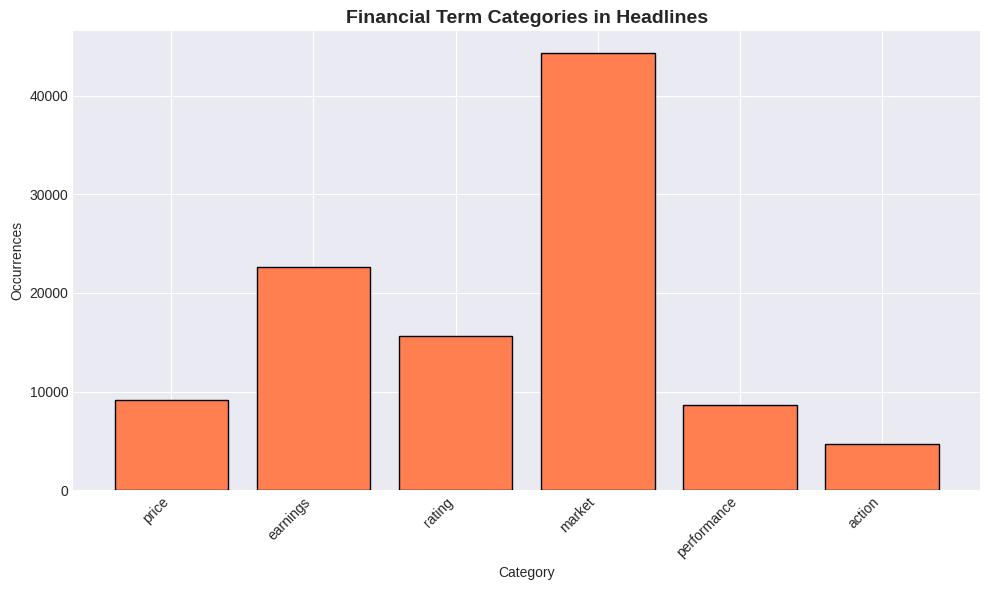

In [26]:
# Identify common financial terms
financial_terms = {
    'price': ['price', 'target', 'pt'],
    'earnings': ['earnings', 'eps', 'revenue', 'sales'],
    'rating': ['rating', 'upgrade', 'downgrade', 'maintains', 'initiates'],
    'market': ['stock', 'stocks', 'shares', 'market'],
    'performance': ['high', 'low', 'gains', 'losses', 'beats', 'misses'],
    'action': ['buy', 'sell', 'hold', 'analyst', 'analysts']
}

# Count occurrences of each category
category_counts = {}
for category, terms in financial_terms.items():
    count = 0
    for term in terms:
        matching = [w for w, c in keywords if term in w.lower()]
        if matching:
            count += sum([c for w, c in keywords if term in w.lower()])
    category_counts[category] = count

print("\n=== FINANCIAL TERM CATEGORIES ===\n")
for category, count in sorted(category_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{category.capitalize():15s}: {count:,} occurrences")

# Visualize
plt.figure(figsize=(10, 6))
categories = list(category_counts.keys())
counts = list(category_counts.values())
plt.bar(categories, counts, color='coral', edgecolor='black')
plt.title('Financial Term Categories in Headlines', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


=== SENTIMENT INDICATORS IN HEADLINES ===

Positive  : 40,093 occurrences (40.4% of articles)
Negative  : 24,325 occurrences (24.5% of articles)
Neutral   : 11,306 occurrences (11.4% of articles)


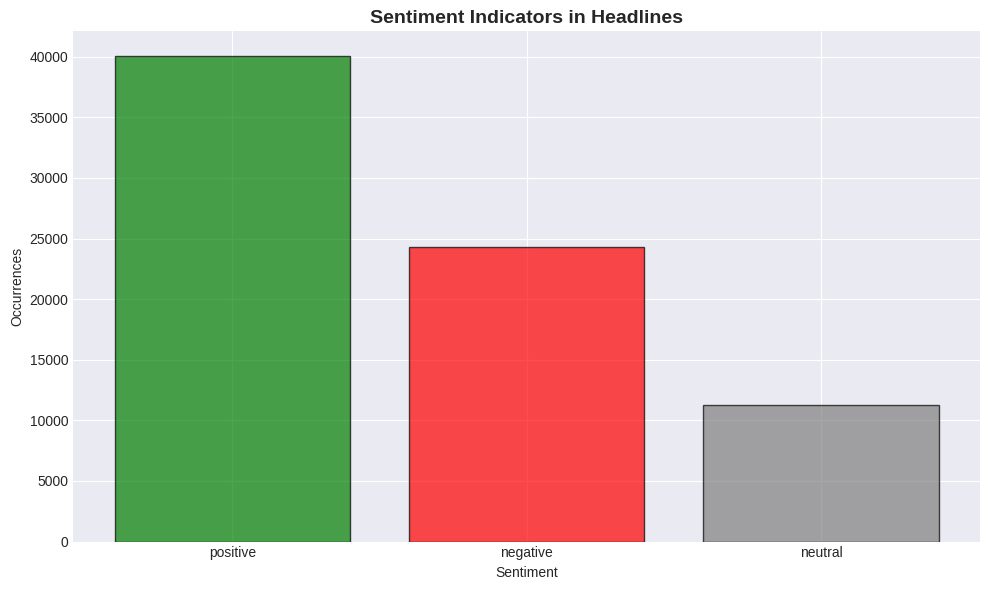

In [27]:
# Analyze headline sentiment indicators
sentiment_keywords = {
    'positive': ['gains', 'high', 'upgrade', 'beats', 'outperform', 'buy', 'rises', 'up'],
    'negative': ['losses', 'low', 'downgrade', 'misses', 'underperform', 'sell', 'falls', 'down'],
    'neutral': ['maintains', 'hold', 'neutral', 'equal', 'peer']
}

# Count sentiment indicators
sentiment_counts = {}
for sentiment, terms in sentiment_keywords.items():
    count = 0
    for term in terms:
        count += df['headline'].str.lower().str.contains(term, regex=False).sum()
    sentiment_counts[sentiment] = count

print("\n=== SENTIMENT INDICATORS IN HEADLINES ===\n")
for sentiment, count in sentiment_counts.items():
    pct = (count / len(df)) * 100
    print(f"{sentiment.capitalize():10s}: {count:,} occurrences ({pct:.1f}% of articles)")

# Visualize
plt.figure(figsize=(10, 6))
colors_map = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
colors = [colors_map[s] for s in sentiment_counts.keys()]
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=colors, edgecolor='black', alpha=0.7)
plt.title('Sentiment Indicators in Headlines', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Occurrences')
plt.tight_layout()
plt.show()

## 9. Summary and Key Findings

Let's summarize the key insights from our EDA.

In [28]:
print("=" * 80)
print("EXPLORATORY DATA ANALYSIS - KEY FINDINGS")
print("=" * 80)

print("\n📊 DATASET OVERVIEW")
print(f"  • Total articles analyzed: {len(df):,}")
print(f"  • Unique stocks covered: {df['stock'].nunique():,}")
print(f"  • Unique publishers: {df['publisher'].nunique():,}")
print(f"  • Date range: {df['date'].min().date()} to {df['date'].max().date()}")

print("\n📝 HEADLINE CHARACTERISTICS")
print(f"  • Average headline length: {df['headline_length'].mean():.1f} characters")
print(f"  • Average word count: {df['word_count'].mean():.1f} words")
print(f"  • Typical headline: {df['headline_length'].median():.0f} characters, {df['word_count'].median():.0f} words")

print("\n✍️ PUBLISHER INSIGHTS")
top_pub = publisher_stats.iloc[0]
print(f"  • Most active publisher: {publisher_stats.index[0]}")
print(f"  • Top 10 publishers: {top_10_pct:.1f}% of content")
print(f"  • Publisher concentration: High (top 20 = {top_20_pct:.1f}%)")

print("\n📈 STOCK COVERAGE")
top_stock = stock_stats.iloc[0]
print(f"  • Most covered stock: {stock_stats.index[0]} ({top_stock['article_count']:,} articles)")
print(f"  • Top 50 stocks: {top_50_stocks_pct:.1f}% of coverage")
print(f"  • Coverage distribution: Highly concentrated on major stocks")

print("\n📅 TEMPORAL PATTERNS")
peak_hour = time_stats['hourly'].idxmax()
peak_day = time_stats['day_of_week'].idxmax()
print(f"  • Peak publication hour: {peak_hour}:00 ({time_stats['hourly'][peak_hour]:,} articles)")
print(f"  • Peak publication day: {day_names[peak_day]} ({time_stats['day_of_week'][peak_day]:,} articles)")
print(f"  • Weekday vs Weekend: {weekend_counts[False]/len(df)*100:.1f}% weekday")
print(f"  • Publication consistency: Active throughout business hours")

print("\n🔤 CONTENT ANALYSIS")
print(f"  • Top keywords: {', '.join([w for w, c in keywords[:5]])}")
print(f"  • Common themes: Price targets, earnings, analyst ratings")
print(f"  • Sentiment distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"    - {sentiment.capitalize()}: {(count/len(df)*100):.1f}%")

print("\n💡 KEY INSIGHTS")
print("  • News is heavily concentrated on large-cap, actively traded stocks")
print("  • Publications peak during market hours (pre-market and trading hours)")
print("  • Majority of content comes from a small number of publishers")
print("  • Headlines focus on price targets, ratings, and earnings")
print("  • Sentiment language is prevalent in headlines")

print("\n" + "=" * 80)

EXPLORATORY DATA ANALYSIS - KEY FINDINGS

📊 DATASET OVERVIEW
  • Total articles analyzed: 99,159
  • Unique stocks covered: 388
  • Unique publishers: 522
  • Date range: 2009-04-29 to 2020-06-10

📝 HEADLINE CHARACTERISTICS
  • Average headline length: 73.8 characters
  • Average word count: 11.4 words
  • Typical headline: 65 characters, 10 words

✍️ PUBLISHER INSIGHTS
  • Most active publisher: Paul Quintaro
  • Top 10 publishers: 69.4% of content
  • Publisher concentration: High (top 20 = 81.2%)

📈 STOCK COVERAGE
  • Most covered stock: AA (2,697 articles)
  • Top 50 stocks: 48.2% of coverage
  • Coverage distribution: Highly concentrated on major stocks

📅 TEMPORAL PATTERNS
  • Peak publication hour: 0:00 (95,479 articles)
  • Peak publication day: Wednesday (21,338 articles)
  • Weekday vs Weekend: 98.5% weekday
  • Publication consistency: Active throughout business hours

🔤 CONTENT ANALYSIS
  • Top keywords: stocks, est, eps, shares, reports
  • Common themes: Price targets, ea

## 10. Export Processed Data

Save the preprocessed data for use in subsequent tasks.

In [29]:
# Save processed data
output_path = '../Data/processed_news_sample.csv'
df.to_csv(output_path, index=False)
print(f"✅ Processed data saved to: {output_path}")

print(f"\n📦 Saved {len(df):,} rows with {len(df.columns)} columns")
print(f"Columns: {', '.join(df.columns.tolist())}")

✅ Processed data saved to: ../Data/processed_news_sample.csv

📦 Saved 99,159 rows with 15 columns
Columns: headline, url, publisher, date, stock, year, month, day, hour, dayofweek, date_only, headline_length, word_count, publisher_domain, is_weekend


## Conclusion

This EDA has provided comprehensive insights into the financial news dataset:

1. **Data Quality**: Clean dataset with minimal missing values
2. **Publisher Landscape**: Dominated by major financial news outlets
3. **Stock Coverage**: Concentrated on high-profile stocks
4. **Temporal Patterns**: Clear market-hours publication patterns
5. **Content Themes**: Focus on ratings, price targets, and earnings

**Next Steps for Task 2**: 
- Download historical stock price data for covered stocks
- Calculate technical indicators (SMA, RSI, MACD)
- Visualize price movements and indicators

**Next Steps for Task 3**:
- Perform sentiment analysis on headlines
- Align news data with stock prices
- Analyze correlation between sentiment and returns